# 2 Importações

In [2]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(__file__), '../../') if '__file__' in globals() else '../../')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from src.util import dados_limpos_Faixa_De_Renda

In [3]:
df = pd.read_csv("../../data/raw/DH_2022_Br_Regioes_20240423.xlsx - Faixa De Renda.csv")
df_regioes, df_brasil = dados_limpos_Faixa_De_Renda(df)

# 2.1 O Peso da Renda no Déficit

C:\Users\mtand\AppData\Local\Temp\ipykernel_17296\3260672744.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = df_brasil,


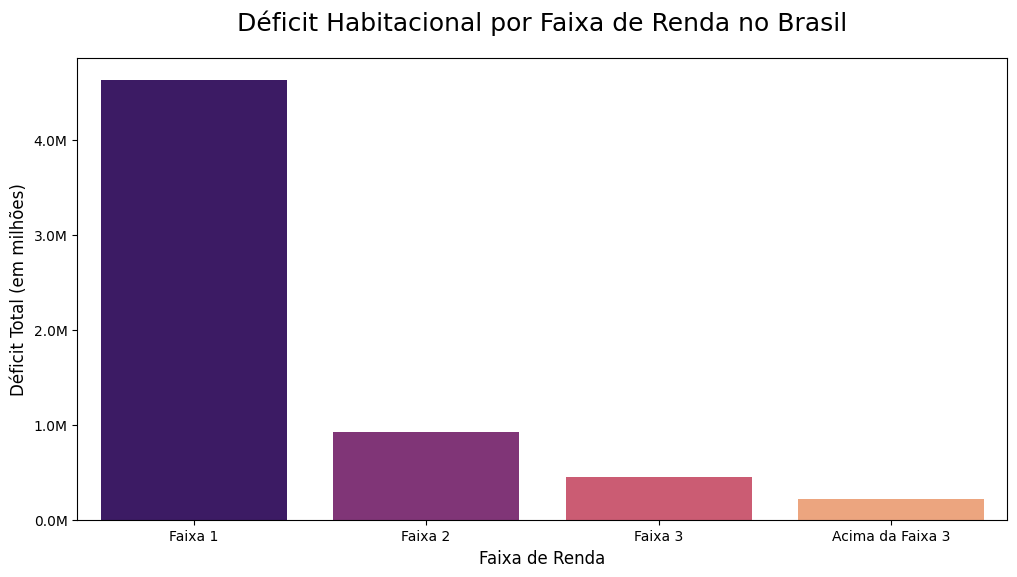

In [5]:
df_brasil = df_brasil[df_brasil['regiao'] == 'Brasil'].copy()

ordem_renda = ['Faixa 1', 'Faixa 2', 'Faixa 3', 'Acima da Faixa 3']
df_brasil['faixa_de_renda'] = pd.Categorical(df_brasil['faixa_de_renda'], categories=ordem_renda, ordered=True)

plt.figure(figsize=(12,6))
sns.barplot( data = df_brasil,
    x = 'faixa_de_renda',
    y = 'deficit_total',
    palette = 'magma')

plt.title('Déficit Habitacional por Faixa de Renda no Brasil', fontsize=18, pad=20)
plt.xlabel('Faixa de Renda', fontsize=12)
plt.ylabel('Déficit Total (em milhões)', fontsize=12)

formatter = plt.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# 2.2 Por que cada faixa de renda sofre

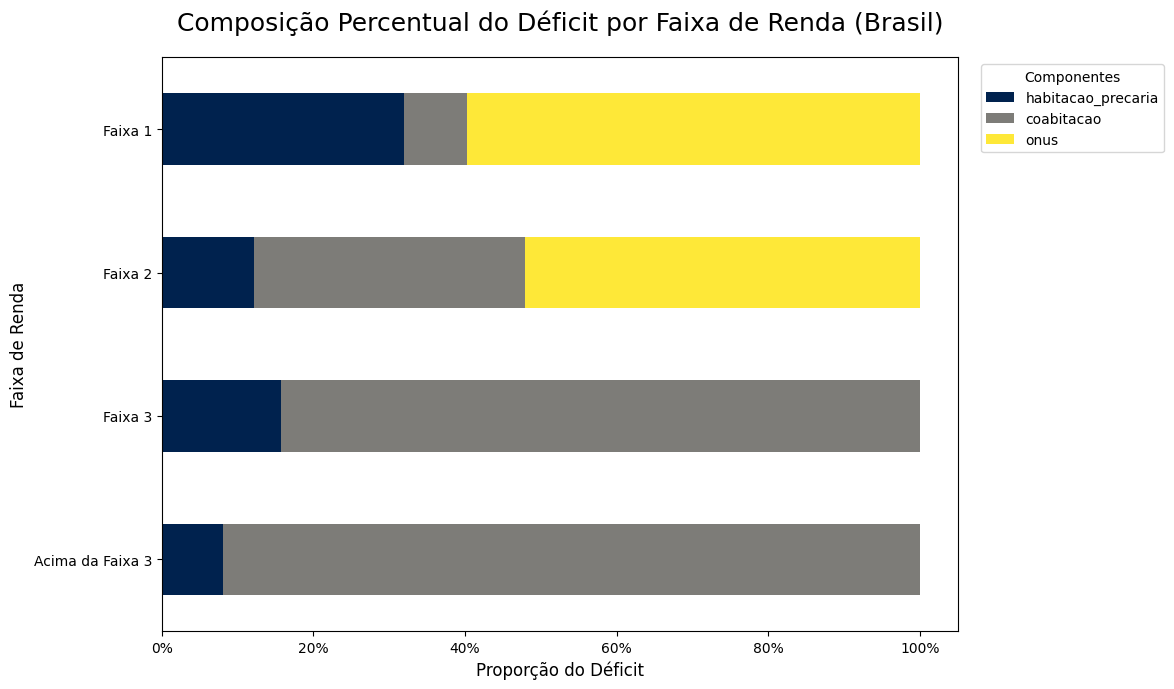

In [6]:
componentes_renda = df_brasil.set_index('faixa_de_renda')[['habitacao_precaria', 'coabitacao', 'onus']]

componentes_percentual = componentes_renda.div(componentes_renda.sum(axis=1), axis=0)

componentes_percentual.plot(
    kind='barh', 
    stacked=True, 
    figsize=(14, 7), 
    colormap='cividis'
)

plt.title('Composição Percentual do Déficit por Faixa de Renda (Brasil)', fontsize=18, pad=20)
plt.xlabel('Proporção do Déficit', fontsize=12)
plt.ylabel('Faixa de Renda', fontsize=12)
plt.gca().invert_yaxis() 
plt.legend(title='Componentes', bbox_to_anchor=(1.02, 1), loc='upper left')

formatter = plt.FuncFormatter(lambda x, pos: f'{x:.0%}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# 2.3 Detalhe Regional

C:\Users\mtand\AppData\Local\Temp\ipykernel_17296\387432480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


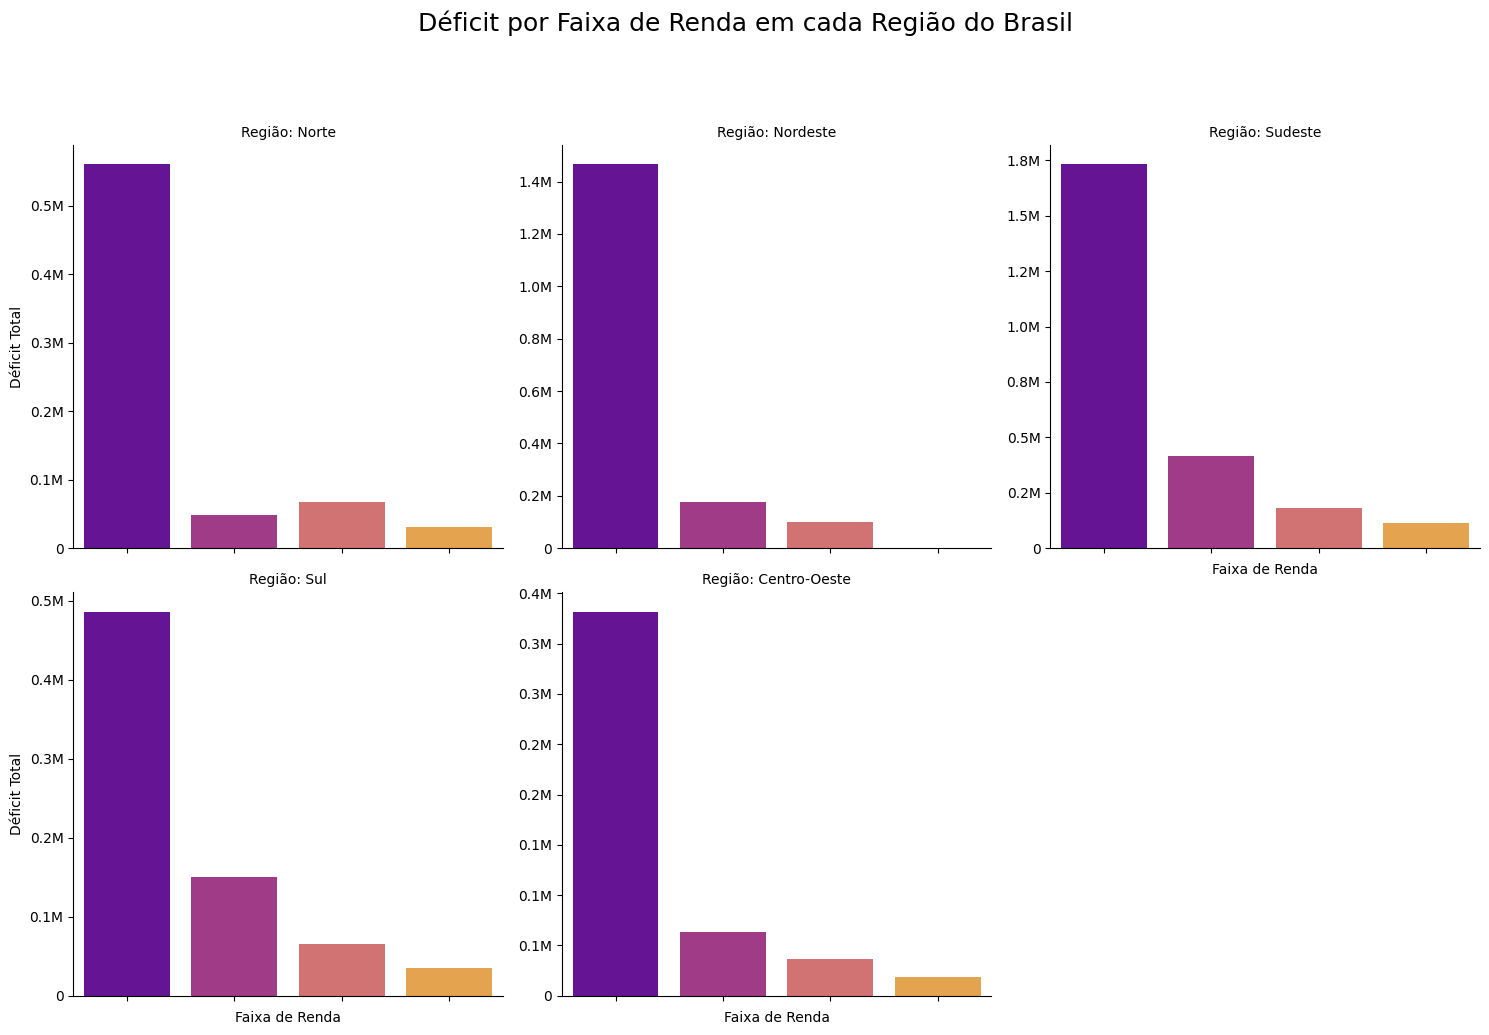

In [7]:
ordem_renda = ['Faixa 1', 'Faixa 2', 'Faixa 3', 'Acima da Faixa 3']
df_regioes['faixa_de_renda'] = pd.Categorical(df_regioes['faixa_de_renda'], categories=ordem_renda, ordered=True)

g = sns.catplot(
    data=df_regioes,
    x='faixa_de_renda',
    y='deficit_total',
    col='regiao',
    kind='bar',
    palette='plasma',
    col_wrap=3, 
    sharey=False 
)

g.fig.suptitle('Déficit por Faixa de Renda em cada Região do Brasil', y=1.03, fontsize=18)
g.set_axis_labels("Faixa de Renda", "Déficit Total")
g.set_xticklabels(rotation=45, ha='right')
g.set_titles("Região: {col_name}")

for ax in g.axes.flat:
    formatter = plt.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M' if x > 0 else '0')
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()